# Introduction to Regression with neural network in Tensorflow

Regression:Predicting numerical variable based on some other combination of variable

In [188]:
#Import tensorflow 
import tensorflow as tf
print(tf.__version__)

2.9.2


## Creating data to view and fit

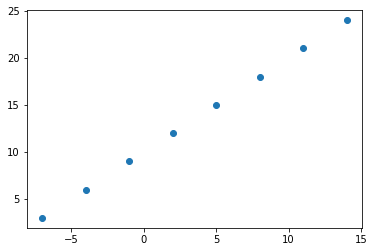

In [189]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#Create labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#visualize it
plt.scatter(X,y)

In [190]:
y==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [191]:
# Create a demo tensor for our housing price prediction problem
house_info=tf.constant(["bedroom","bathroom","garage"])
house_price=tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [192]:
X[0],y[0]

(-7.0, 3.0)

In [193]:
X[1],y[1]

(-4.0, 6.0)

In [194]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape,output_shape

((), ())

In [195]:
X[0:2].ndim

1

In [196]:
X

array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])

In [197]:
X[0],y[0]

(-7.0, 3.0)

In [198]:
#Turn numpy array into  tensors
X=tf.constant(X)
y=tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [199]:
X[0]

<tf.Tensor: shape=(), dtype=float64, numpy=-7.0>

In [200]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

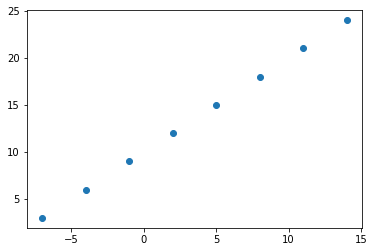

In [201]:
plt.scatter(X,y)

## Steps in modeling with Tensorflow
1. **Creating a model** - define the input and output layers , as well as hidden layers of a deep learning model.
2. **Compiling  a model** - define the loss function (function which tells our model how wrong it is) and the optimizer (tell the model how to improve the patterns its learning ) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting a model try to find patterns between X & y (features and labels)

In [202]:
from tensorflow.python import metrics
#Set random seed
tf.random.set_seed(42)

# 1.Create a model using Sequential API
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)    #Only 1 layers
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,#Mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #St gradient decent
              metrics=tf.keras.metrics.mae
              )
#3 fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5)


Epoch 1/5
1/1 [==============================] - 0s 263ms/step - loss: 11.5048 - mean_absolute_error: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 11.3723 - mean_absolute_error: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 11.2398 - mean_absolute_error: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 11.1073 - mean_absolute_error: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 10.9748 - mean_absolute_error: 10.9748


In [203]:
#Check out X and Y
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [204]:
#Try and make predictions using our model
y_pred=model.predict([16.0])
y_pred

1/1 [==============================] - 0s 47ms/step


array([[11.970961]], dtype=float32)

## Improving our model
We can imporve our model, by altering the steps we took to create a model.
1. **Creating  a model** -We might add more layers, inc the number of hidden units(also called neurons) within each hidden layers,change the activation function of each layer
2. **Compling a model** - We might change the optimization function or perhaps **learning rate ** of optimization function

3. **Fitting a  model** - fit a model for more **epochs** (leave it training for longer) or on more data (give the model more example to learn from)

In [205]:
#Let rebuilt our model

#1. Create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile
model.compile(loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=tf.keras.metrics.mae
     )

#3. Fit the model (Train  for longer)
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 271ms/step - loss: 11.2219 - mean_absolute_error: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 11.0894 - mean_absolute_error: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 10.9569 - mean_absolute_error: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.8244 - mean_absolute_error: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 10.6919 - mean_absolute_error: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.5594 - mean_absolute_error: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 10.4269 - mean_absolute_error: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 10.2944 - mean_absolute_error: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 10.1619 - mean_absolute_error: 10.1619
Epoc

In [206]:
# Remind ourself of the data
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [207]:
#Checking if  model is improved
model.predict([17])

1/1 [==============================] - 0s 85ms/step


array([[29.739855]], dtype=float32)

In [208]:
# Let's see of we an make another to improve our model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"), # adding the hidden layers
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01), #Learning rate is imp factor
              metrics=["mae"]
              )
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 348ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.5062 - mae: 11.5062
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 10.6739 - mae: 10.6739
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 9.8419 - mae: 9.8419
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 8.9961 - mae: 8.9961
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 8.1346 - mae: 8.1346
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 7.4052 - mae: 7.4052
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 6.6763 - mae: 6.6763
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 5.9140 - mae: 5.9140
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 5.1124 - mae: 5.1124
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 4.2652 - m

In [209]:
# Reminding ourself of the data
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [210]:
#Prediction 
model.predict([17]) #Overfiting ?

1/1 [==============================] - 0s 53ms/step


array([[27.15925]], dtype=float32)

## Evaluatin a Model
In practice , a typical workflow you will go through when building neural network is :

```
Build a model -> fit it-> Evaulate it -> tweak a model -> fit it -> Evaluate it -> Tweak a  model .....
```


## When it comes to Evaluation :
Visialize a model
It's a good idea to visualize:

* The data - what data are we working with , what does it look like?
*The model itself- what does our model looks like?
*The training of a model -how does a model perform when it learns?
*The prediction of the model-How do the predictions of a model line up against the ground truth (original labels)?


In [211]:
# Make a bigger dataset
X=tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [212]:
#Make labels for dataset
y=tf.add(X,10)
y             

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

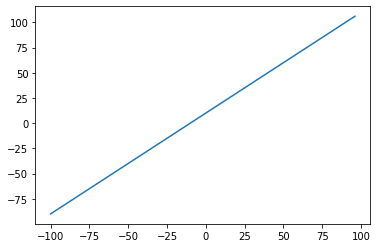

In [213]:
# Visualize the data
import matplotlib.pyplot as plt
plt.plot(X,y)

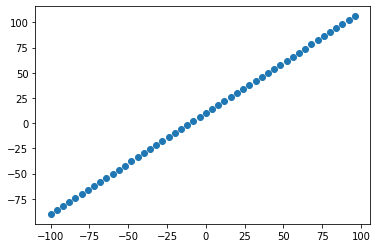

In [214]:
plt.scatter(X,y)

### The 3 sets ...
* **Training set** - model learns from this data , which is typically 70-80% of data available
* **Validation set** - the model gets tuned on this data, which is typically 10-15%
* Test set -  model gets evaluated on this data what it has learned , 10-15 %

In [215]:
# Check the length of how many samples we have
len(X)

50

In [216]:
# Split the data into train  and test sets
X_train=X[:40] # First 40 are training samples 
y_train=y[:40]
X_test=X[40:]
y_test=y[40:]
len(X_train),len(X_test),len(y_train),len(y_test)

(40, 10, 40, 10)

# Vislisalizng the Data
We got test and train sets , lets visualize it 

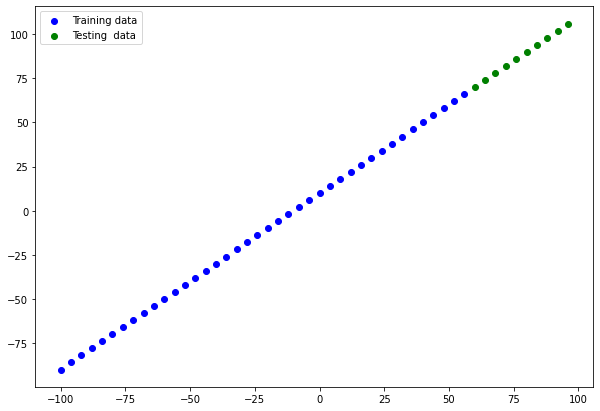

In [217]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,c='b',label="Training data") #Plotting training data in blue
plt.scatter(X_test,y_test,c='g',label="Testing  data")# want our model to be able to predict this (given X, what's y)
plt.legend()

In [218]:
X_train=tf.expand_dims(X_train,axis=-1)
X_test=tf.expand_dims(X_test,axis=-1)
# Building NN for data

#1. Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)
# 3. fit the model
# model.fit(X_train,y_train,epochs=100)

In [219]:
#Visualizing the model
model.summary()

ValueError: ignored

In [ ]:
#Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

#1. create a model(same as above)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
],name="Model_1")
# 2. Compile a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )

In [220]:

model.summary()

ValueError: ignored


* Total params - total number of parameters in the model.

* Trainable parameters -these are the parameters  (patterns) the model can update as it trains.

* Non -trainable params - these parameters arent updated during training ( this is typical when u  bring in already learn patterns or parameters from other models during transfer learning)

In [221]:
model.fit(X_train,y_train,epochs=100,verbose=0)

In [222]:
# Get summary of our model
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


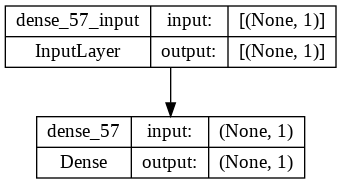

In [223]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

# Visualizing model predictions

To visualize predictions,it's a good idea to plot them against ground truth labels.
Pften you'll see this in the form of `y_test` or `y_true` vs `y_pred` (ground truth vs model predictions).

In [224]:
# Make some predictions
y_pred=model.predict(X_test)
y_pred

1/1 [==============================] - 0s 101ms/step


array([[56.60357 ],
       [60.289223],
       [63.974876],
       [67.66053 ],
       [71.34618 ],
       [75.03184 ],
       [78.7175  ],
       [82.40315 ],
       [86.088806],
       [89.77446 ]], dtype=float32)

In [225]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [226]:
#Creating a plotting funtion
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=y_pred
                    ):
  """
  Plots training data ,test data and compares prediciton to ground truth
  """
  plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data,train_labels,c="b",label="Training data")
  #Plot testing data
  plt.scatter(test_data,test_labels,c="g",label="Testing data")
  #Plot model prediction in red
  plt.scatter(test_data,predictions,c="r",label="Predictions")
  # Show the legend
  plt.legend()  

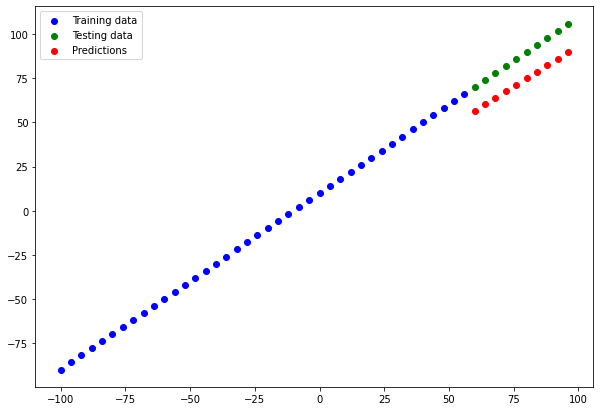

In [227]:

plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=y_pred)

## Evaluating our model's prediction with regression evaluation metrics

Depending on the problem you're working on,there will be different evaluaiton metrics to evaluate your model's performance.

Since its regression , 2 of the main metrics:
* Mae - mean absolute error , on average how wrong is each of my model prediction.
* MSE - mean square error - "Sqauring average errors"

In [228]:

#Evaluate  the model on the test set
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 177ms/step - loss: 14.8110 - mae: 14.8110


[14.810986518859863, 14.810986518859863]

In [229]:
y_pred=tf.constant(y_pred)
y_pred

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[56.60357 ],
       [60.289223],
       [63.974876],
       [67.66053 ],
       [71.34618 ],
       [75.03184 ],
       [78.7175  ],
       [82.40315 ],
       [86.088806],
       [89.77446 ]], dtype=float32)>

In [230]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [231]:
# Mean absulute error
mae=tf.keras.losses.MAE(y_test,y_pred).numpy()
mae

array([31.39643 , 27.71078 , 24.025124, 20.33947 , 16.923054, 14.180898,
       12.113001, 10.71937 , 10.      , 10.      ], dtype=float32)

In [232]:
mae==tf.metrics.mean_absolute_error(y_test,y_pred)

<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])>

In [233]:
y_pred=tf.squeeze(y_pred)
y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([56.60357 , 60.289223, 63.974876, 67.66053 , 71.34618 , 75.03184 ,
       78.7175  , 82.40315 , 86.088806, 89.77446 ], dtype=float32)>

In [234]:
#Calculate mae now
mae=tf.metrics.MAE(y_test,y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=14.8109865>

In [235]:
#Calculating mean square error 
mse=tf.metrics.MSE(y_test,y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=220.18051>

In [236]:
# Make some function to reuse  MAE and MSE
def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,y_pred=tf.squeeze(y_pred))

def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,y_pred=tf.squeeze(y_pred))


In [237]:
mae(y_test,y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=14.8109865>

### Running experiments to imporve our model

```
Built a model ->fit it-> evaluate it -> tweak it->fit it ......
```
1. Get more data - get more examples for your model to train on (more opp. to learn patterns or relationship btw features and labels)
2. Make your model larger (using more complex model) - More layers,more hidden units in each layer.
3. Train for longer - give your model more chance to find patterns in the data.

In [238]:
X_train=tf.squeeze(X_train)

In [239]:
X_train,y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [240]:
X_test=tf.squeeze(X_test)
X_train=tf.expand_dims(X_train,axis=-1)
X_test=tf.expand_dims(X_test,axis=-1)

## Let's do 3 modeling Experiment:
1. `model_1`:-same as original one, 1 layer but 100 ephocos
2. `model_2`- 2 layers ,100 ephocs
3. `model_3`- 2 layers , 500 ephocs

**Build model_1**


In [241]:
# Set random seed 
tf.random.set_seed(42)

# 1. Create the model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
#2. Compile the model
model_1.compile(
     loss=tf.keras.losses.MAE,
     optimizer=tf.keras.optimizers.SGD(),
     metrics=["mae"]
)
#3. Fit the model
model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - l

1/1 [==============================] - 0s 37ms/step


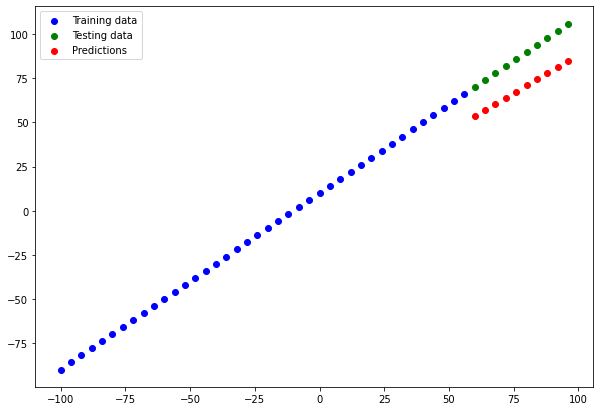

In [242]:
# Make and plot predictions for model 1
y_pred_1=model_1.predict(X_test)
plot_prediction(predictions=y_pred_1)

In [243]:
# Calculate model_1 evaluation metrics
mae_1=mae(y_test,y_pred_1)
mae_1

<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>

In [244]:
mse_1=mse(y_test,y_pred_1)
mse_1

<tf.Tensor: shape=(), dtype=float32, numpy=353.5734>

**Build**  **`` model_2 ``** 
* 2 dense layers , 100 ephocs 

In [245]:
#set random seed
tf.random.set_seed(42)
#1. Create the model
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#2 Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"]

                )
#3. Fit the model
model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 27.4058 - mse: 1084.1481
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 29.8935 - mse: 1334.8955
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1988 - mse: 151.3508
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 40.4763 - mse: 2586.0081
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 27.8687 - mse: 1094.4379
Epoch 11/100
2/2 [==========================

1/1 [==============================] - 0s 45ms/step


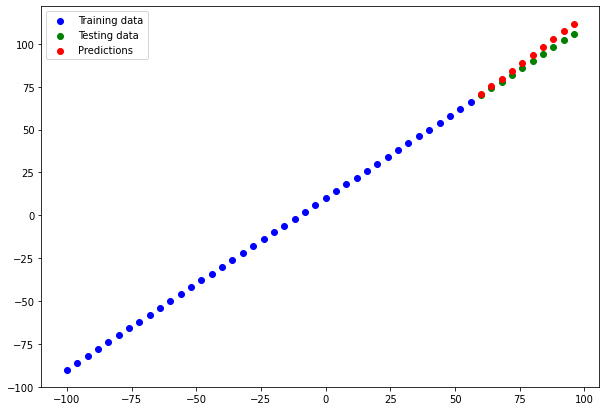

In [246]:
# Make and plot predictions
y_preds_2=model_2.predict(X_test)
plot_prediction(predictions=y_preds_2)

In [247]:
# Calculation model_2 evaluation metrics
mae_2=mae(y_test,y_preds_2)
mse_2=mse(y_test,y_preds_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969466>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070175>)

**Build `model_3`**
* 2 layers, 500 ephocs

In [248]:
#set random seed
tf.random.set_seed(42)
#1. Create the model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#2 Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"]

                )
#3. Fit the model
model_3.fit(X_train,y_train,epochs=1000)

Epoch 1/1000
2/2 [==============================] - 0s 9ms/step - loss: 27.4058 - mse: 1084.1481
Epoch 2/1000
2/2 [==============================] - 0s 8ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/1000
2/2 [==============================] - 0s 8ms/step - loss: 29.8935 - mse: 1334.8955
Epoch 4/1000
2/2 [==============================] - 0s 7ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/1000
2/2 [==============================] - 0s 7ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/1000
2/2 [==============================] - 0s 11ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/1000
2/2 [==============================] - 0s 10ms/step - loss: 11.1988 - mse: 151.3508
Epoch 8/1000
2/2 [==============================] - 0s 6ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/1000
2/2 [==============================] - 0s 6ms/step - loss: 40.4763 - mse: 2586.0081
Epoch 10/1000
2/2 [==============================] - 0s 9ms/step - loss: 27.8687 - mse: 1094.4379
Epoch 11/1000
2/2 [=============

1/1 [==============================] - 0s 58ms/step


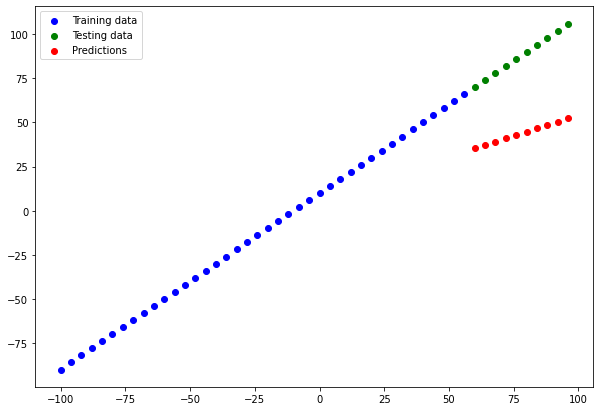

In [249]:
# Make and plot predictions
y_preds_3=model_3.predict(X_test)
plot_prediction(predictions=y_preds_3)

In [250]:
# Calculation model_2 evaluation metrics
mae_3=mae(y_test,y_preds_3)
mse_3=mse(y_test,y_preds_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=44.216827>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1992.3018>)

Note : You want to start with small experiments(small models) and make sure they work and then increase their scale when necessary.

## Comparing the result of our Experiment
Let's compare the result

In [251]:
# Let's compare our model's result using pandas Dataframe
import pandas as pd

model_results=[["Model_1",mae_1.numpy(),mse_1.numpy()],
               ["Model_2",mae_2.numpy(),mse_2.numpy()],
               ["Model_3",mae_3.numpy(),mse_3.numpy()]
               ]
all_results=pd.DataFrame(model_results,columns=["Model","Mae","Mse"]) 
all_results              

,Model,Mae,Mse
0,Model_1,18.745327,353.573395
1,Model_2,3.196947,13.070175
2,Model_3,44.216827,1992.301758


Model 2 performs the best .

In [252]:
model_2.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 10)                20        
                                                                 
 dense_60 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


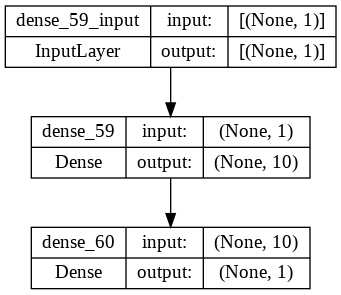

In [253]:
tf.keras.utils.plot_model(model_2, show_shapes=True)

## *Note* : One of main goals should be to minimize the time between our experiments . The more experiment you do , the more things you will figure out which dont work and in turn ,  get closer  to figuring out what does work . "ExperimentX3"

### Tracking your experiments
One really good habit in Ml modeling is to track the result of your experiment

And when doing so , it can be tedious if u running lots of experiments.

Tools:
* TensorBoard - a component of the tensorflow library to help track modelling experiments
* Weights & Baises

### Saving our models
Saving our models allows us to use them outside of Google collab (or wherever they were trained) such as in web application or a mobile app

2 ways to save our model's :
1. The SavedModel format
2. The HDF5 format

In [254]:
 #save model  using savemodel format
model_2.save("Best_Model_Savedmodel_format")

In [255]:
# Save model using HDF5 format
model_2.save("Best_model_HDF5_format.h5")

## Loading in save model

In [256]:
# Load in SaveModel format model
loaded_SaveModel_format=tf.keras.models.load_model("/content/Best_Model_Savedmodel_format")

In [257]:
loaded_SaveModel_format.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 10)                20        
                                                                 
 dense_60 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [258]:
model_2.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 10)                20        
                                                                 
 dense_60 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [259]:
model_2_preds=model_2.predict(X_test)
loaded_SaveModel_format_preds=loaded_SaveModel_format.predict(X_test)
loaded_SaveModel_format_preds==model_2_preds

1/1 [==============================] - 0s 58ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [260]:
mae(y_true=y_test,y_pred=model_2_preds)==mae(y_true=y_test,y_pred=loaded_SaveModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [261]:
#Load in a model using .h5 format
loaded_h5_format=tf.keras.models.load_model("/content/Best_model_HDF5_format.h5")

In [262]:
loaded_h5_format_preds=loaded_h5_format.predict(X_test)


1/1 [==============================] - 0s 59ms/step


In [263]:
loaded_h5_format_preds==model_2_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google collab
If u want to download your files from Google collab:
1. Right click and Download
2. Code 
3. Save it to google drive and copying it there

In [264]:
#Download a file from Google Colab
from google.colab import files
files.download("/content/Best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [265]:
# Save a file from google collab to google drive 
!cp /content/Best_model_HDF5_format.h5  /content/drive/MyDrive

## A larger Example

In [266]:
tf.squeeze(X_train),y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [267]:
#Import required libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [268]:
# Read in the insurance dataset
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [269]:
insurance["sex"]

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [270]:
insurance["smoker"]

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [271]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [272]:
 # Create X & y values (features and labels)
X=insurance_one_hot.drop("charges",axis=1)
y=insurance_one_hot["charges"]

In [273]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [274]:
#View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [275]:
# Creating Train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
len(X),len(X_train),len(X_test)

(1338, 1070, 268)

In [276]:
#Build a neural network (like model 2 above)
tf.random.set_seed(42)

#1. Create a model
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
#2. Compile the model
insurance_model.compile(loss=tf.keras.losses.MAE,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"]
                        )
#3. Fit the model
insurance_model.fit(tf.expand_dims(X_train,axis=1),y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 7ms/step - loss: 8868.5918 - mae: 8868.5918
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 7887.1597 - mae: 7887.1597
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 7537.0947 - mae: 7537.0947
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 7859.4336 - mae: 7859.4336
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 7639.6699 - mae: 7639.6699
Epoch 6/100
34/34 [==============================] - 0s 6ms/step - loss: 7578.0840 - mae: 7578.0840
Epoch 7/100
34/34 [==============================] - 0s 7ms/step - loss: 7514.6162 - mae: 7514.6162
Epoch 8/100
34/34 [==============================] - 0s 7ms/step - loss: 7694.1348 - mae: 7694.1348
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 7595.9121 - mae: 7595.9121
Epoch 10/100
34/34 [==============================] - 0s 6ms/step - loss: 7735.9106 - mae: 7735.9106

In [277]:
# Check the result of insurance model on test data
insurance_model.evaluate(tf.expand_dims(X_test,axis=1),y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8628.2344 - mae: 8628.2344


[8628.234375, 8628.234375]

In [278]:
y_train.median(),y_train.mean()

(9575.4421, 13346.089736364485)

##Improving our model ...

To(try) improve our model , we will run 2 experiments:
1. Add extra layer for more hidden units
2. Train for longer

In [279]:
#Set random seed
tf.random.set_seed(42)
#1. Create the model
insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
insurance_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)
# 3. Fit the model
insurance_model_2.fit(tf.expand_dims(X_train,axis=1),y_train,epochs=100,verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 13104.4287 - mae: 13104.4287
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 12749.5400 - mae: 12749.5400
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 9457.7188 - mae: 9457.7188
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 8147.6533 - mae: 8147.6533
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7528.8398 - mae: 7528.8398
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7409.0811 - mae:

In [280]:
# Evaluate the larger model
insurance_model_2.evaluate(tf.expand_dims(X_test,axis=1),y_test)

9/9 [==============================] - 0s 4ms/step - loss: 4924.5107 - mae: 4924.5107


[4924.5107421875, 4924.5107421875]

In [281]:
insurance_model.evaluate(tf.expand_dims(X_test,axis=1),y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8628.2344 - mae: 8628.2344


[8628.234375, 8628.234375]

In [282]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model 
insurance_model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"]
                          )
history=insurance_model_3.fit(tf.expand_dims(X_train,axis=1),y_train,epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 13104.4287 - mae: 13104.4287
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 12749.5400 - mae: 12749.5400
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 9457.7188 - mae: 9457.7188
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 8147.6533 - mae: 8147.6533
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 7528.8398 - mae: 7528.8398
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 7409.0811 - mae:

In [283]:
insurance_model_3.evaluate(tf.expand_dims(X_test,axis=1),y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3494.5322 - mae: 3494.5322


[3494.5322265625, 3494.5322265625]

Text(0.5, 0, 'epochs')

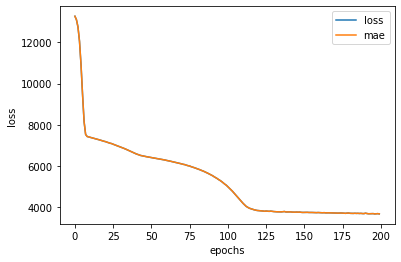

In [284]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

 ## Preprocessing data (normalization and stadardization)
In terms of scaling values , Neural networks tend to prefer normalization.

If u're not sure which to use,you could try both and see which performs better.


In [285]:
import pandas as pd
import numpy as np
import tensorflow as tf
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


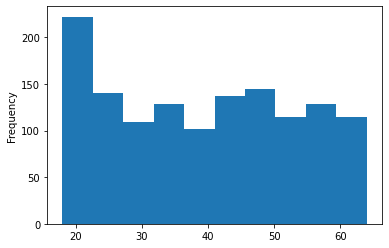

In [286]:
X["age"].plot(kind="hist")

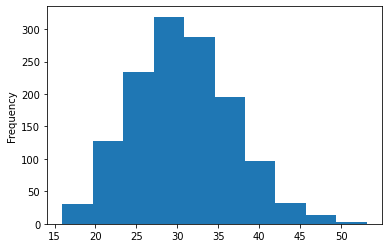

In [287]:
X["bmi"].plot(kind="hist")

In [288]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

## To prepare our data , we borrow classes from scikit-learn

In [289]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]), # Turn all values in these columns between 0-1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

# Create X and y values
X=insurance.drop("charges",axis=1)
y=insurance["charges"]
#Build our train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization(Min-Max and one hot)
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)


In [290]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [291]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [292]:
X_train.shape,X_train_normal.shape

((1070, 6), (1070, 11))

Data is normalized and one hot encodedn, Bulding Neural network now

In [293]:
# Build a neural network  model to fit
tf.random.set_seed(42)
#1. create a model
insurace_model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

In [294]:
insurace_model_4.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                         metrics=["mae"]
                         )

In [295]:
insurace_model_4.fit(tf.expand_dims(X_train_normal,axis=1),y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 9233.7920 - mae: 9233.7920
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 4625.0542 - mae: 4625.0542
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 3805.1746 - mae: 3805.1746
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 3661.0764 - mae: 3661.0764
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 3663.1357 - mae: 3663.1357
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 3695.3201 - mae: 3695.3201
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 3754.8955 - mae: 3754.8955
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 3820.7498 - mae: 3820.7498
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 3625.3391 - mae: 3625.3391
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 3712.5298 - mae: 3712.5298

In [296]:
#Evaluate our insurance model  on normalized data
insurace_model_4.evaluate(tf.expand_dims(X_test_normal,axis=1),y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3261.8987 - mae: 3261.8987


[3261.898681640625, 3261.898681640625]

## Neural network regression with TensorFlow Exercises

### Ques1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.

In [297]:
np.random.seed(42)
X_1=np.random.randint(1,10000,size=10000)

In [298]:
X_1

array([7271,  861, 5391, ..., 1390, 4277, 1250])

In [299]:
y_1=np.multiply(X_1,X_1)
y_1=np.add(y_1,10)

In [300]:
## Y=X^2 +10  --- Equation

In [301]:
X_1

array([7271,  861, 5391, ..., 1390, 4277, 1250])

In [302]:
y_1

array([52867451,   741331, 29062891, ...,  1932110, 18292739,  1562510])

In [303]:
X_train_1,X_test_1,y_train_1,y_test_1=train_test_split(X_1,y_1,test_size=0.2,random_state=42)

## Note: You can not slice tensor, it will gonna raise error 

In [304]:
len(X_1),len(X_train_1),len(X_test_1)

(10000, 8000, 2000)

In [305]:
len(y_1),len(y_train_1),len(y_test_1)

(10000, 8000, 2000)

In [306]:
tf.random.set_seed(42)
Ex_model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(60),
    tf.keras.layers.Dense(60),
    tf.keras.layers.Dense(60),
    tf.keras.layers.Dense(60)
])
Ex_model_1.compile(
    
    loss=tf.keras.losses.MAE,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=["mae"]
)
history=Ex_model_1.fit(tf.expand_dims(X_train_1,axis=1),y_train_1,epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 11055778.0000 - mae: 11055778.0000
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 10384398.0000 - mae: 10384398.0000
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 9914134.0000 - mae: 9914134.0000
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 9887479.0000 - mae: 9887479.0000
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 9672639.0000 - mae: 9672639.0000
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 9509767.0000 - mae: 9509767.0000
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 8815501.0000 - mae: 8815501.0000
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 8284159.5000 - mae: 8284159.5000
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 8667982.0000 - mae: 8667982.0000
Epoch 10/100
250/250 [==

In [307]:
Ex_model_1.evaluate(tf.expand_dims(X_test_1,axis=1),y_test_1)

63/63 [==============================] - 0s 2ms/step - loss: 6383705.5000 - mae: 6383705.5000


[6383705.5, 6383705.5]

Text(0.5, 0, 'epochs')

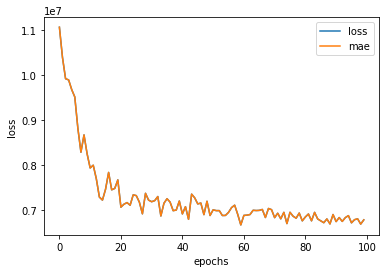

In [308]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")  ## Poorly performed

##Ques 3:
* Try and improve the results we got on the insurance dataset, some things you might want to try include:
* Building a larger model (how does one with 4 dense layers go?).
* Increasing the number of units in each layer.
* Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?
* What happens if you train for longer (say 300 epochs instead of 200)? 

In [309]:
tf.random.set_seed(42)
insurance_model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(1000,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)
])

In [310]:
insurance_model_5.compile(
    loss=tf.keras.losses.MAE,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=["mae"]
)
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [311]:
insurance_model_5.fit(tf.expand_dims(X_train_normal,axis=1),y_train,epochs=300)

Epoch 1/300
34/34 [==============================] - 1s 5ms/step - loss: 7003.3872 - mae: 7003.3872
Epoch 2/300
34/34 [==============================] - 0s 4ms/step - loss: 3848.6379 - mae: 3848.6379
Epoch 3/300
34/34 [==============================] - 0s 4ms/step - loss: 3569.0447 - mae: 3569.0447
Epoch 4/300
34/34 [==============================] - 0s 5ms/step - loss: 3688.0752 - mae: 3688.0752
Epoch 5/300
34/34 [==============================] - 0s 5ms/step - loss: 3378.9421 - mae: 3378.9421
Epoch 6/300
34/34 [==============================] - 0s 4ms/step - loss: 2867.5916 - mae: 2867.5916
Epoch 7/300
34/34 [==============================] - 0s 4ms/step - loss: 2868.0503 - mae: 2868.0503
Epoch 8/300
34/34 [==============================] - 0s 4ms/step - loss: 2869.0266 - mae: 2869.0266
Epoch 9/300
34/34 [==============================] - 0s 4ms/step - loss: 2497.2878 - mae: 2497.2878
Epoch 10/300
34/34 [==============================] - 0s 4ms/step - loss: 2384.2673 - mae: 2384.2673

In [312]:
insurance_model_5.evaluate(tf.expand_dims(X_test_normal,axis=1),y_test)

9/9 [==============================] - 0s 4ms/step - loss: 1669.6604 - mae: 1669.6604


[1669.660400390625, 1669.660400390625]

In [313]:
y_predict_model_5=insurance_model_5.predict(tf.expand_dims(X_test_normal,axis=1))

9/9 [==============================] - 0s 3ms/step


In [314]:
y_predict_model_5=tf.squeeze(y_predict_model_5)
y_predict_model_5=tf.squeeze(y_predict_model_5)
y_predict_model_5.shape

TensorShape([268])

## Ques 4: Import the Boston pricing dataset from TensorFlow tf.keras.datasets and model it.

In [329]:
house=tf.keras.datasets.boston_housing
house_data=house.load_data()
house_data_arr=np.array(house_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


In [330]:
X_train=house_data_arr[0][0]
y_train=house_data_arr[0][1]

In [331]:
X_test=house_data_arr[1][0]
y_test=house_data_arr[1][1]

In [332]:
len(X_train),len(y_train),len(X_test),len(y_test)

(404, 404, 102, 102)

In [333]:
tf.random.set_seed(42)
house_model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)

])

In [334]:
house_model.compile(
    loss=tf.keras.losses.MAE,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=["mae"]
)

In [335]:
house_model.fit(tf.expand_dims(X_train,axis=1),y_train,epochs=300)

Epoch 1/300
13/13 [==============================] - 1s 5ms/step - loss: 813.8160 - mae: 813.8160
Epoch 2/300
13/13 [==============================] - 0s 4ms/step - loss: 9.1594 - mae: 9.1594
Epoch 3/300
13/13 [==============================] - 0s 4ms/step - loss: 7.0378 - mae: 7.0378
Epoch 4/300
13/13 [==============================] - 0s 4ms/step - loss: 6.5401 - mae: 6.5401
Epoch 5/300
13/13 [==============================] - 0s 4ms/step - loss: 6.5892 - mae: 6.5892
Epoch 6/300
13/13 [==============================] - 0s 4ms/step - loss: 6.5443 - mae: 6.5443
Epoch 7/300
13/13 [==============================] - 0s 4ms/step - loss: 6.7348 - mae: 6.7348
Epoch 8/300
13/13 [==============================] - 0s 5ms/step - loss: 6.8265 - mae: 6.8265
Epoch 9/300
13/13 [==============================] - 0s 4ms/step - loss: 7.0433 - mae: 7.0433
Epoch 10/300
13/13 [==============================] - 0s 4ms/step - loss: 6.7210 - mae: 6.7210
Epoch 11/300
13/13 [==============================] - 0

In [336]:
y_predict=house_model.predict(tf.expand_dims(X_test,axis=1))

4/4 [==============================] - 1s 8ms/step


In [337]:
house_model.evaluate(tf.expand_dims(X_test,axis=1),y_test)#Model_1

4/4 [==============================] - 0s 5ms/step - loss: 7.0418 - mae: 7.0418


[7.04176139831543, 7.04176139831543]

In [339]:
mae_1=mae(y_test,y_predict)
mse_1=mse(y_test,y_predict)
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=7.0417614>,
 <tf.Tensor: shape=(), dtype=float32, numpy=95.889275>)

In [340]:
tf.random.set_seed(42) #Model_2
house_model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)

])

In [341]:
house_model.compile(
    loss=tf.keras.losses.MAE,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

In [342]:
house_model.fit(tf.expand_dims(X_train,axis=1),y_train,epochs=300)

Epoch 1/300
13/13 [==============================] - 1s 5ms/step - loss: 3932.5090 - mae: 3932.5090
Epoch 2/300
13/13 [==============================] - 0s 4ms/step - loss: 29.9540 - mae: 29.9540
Epoch 3/300
13/13 [==============================] - 0s 4ms/step - loss: 22.0537 - mae: 22.0537
Epoch 4/300
13/13 [==============================] - 0s 4ms/step - loss: 10.6851 - mae: 10.6851
Epoch 5/300
13/13 [==============================] - 0s 4ms/step - loss: 6.5421 - mae: 6.5421
Epoch 6/300
13/13 [==============================] - 0s 5ms/step - loss: 6.5170 - mae: 6.5170
Epoch 7/300
13/13 [==============================] - 0s 4ms/step - loss: 6.5384 - mae: 6.5384
Epoch 8/300
13/13 [==============================] - 0s 4ms/step - loss: 6.5436 - mae: 6.5436
Epoch 9/300
13/13 [==============================] - 0s 4ms/step - loss: 6.5269 - mae: 6.5269
Epoch 10/300
13/13 [==============================] - 0s 4ms/step - loss: 6.5373 - mae: 6.5373
Epoch 11/300
13/13 [===========================

In [343]:
house_model.evaluate(tf.expand_dims(X_test,axis=1),y_test)

4/4 [==============================] - 1s 8ms/step - loss: 6.6611 - mae: 6.6611


[6.661104679107666, 6.661104679107666]

In [344]:
y_predict=house_model.predict(tf.expand_dims(X_test,axis=1))
mae_2=mae(y_test,y_predict)
mse_2=mse(y_test,y_predict)
mae_2,mse_2

4/4 [==============================] - 0s 4ms/step


(<tf.Tensor: shape=(), dtype=float32, numpy=6.6611047>,
 <tf.Tensor: shape=(), dtype=float32, numpy=88.6718>)

ValueError: ignored

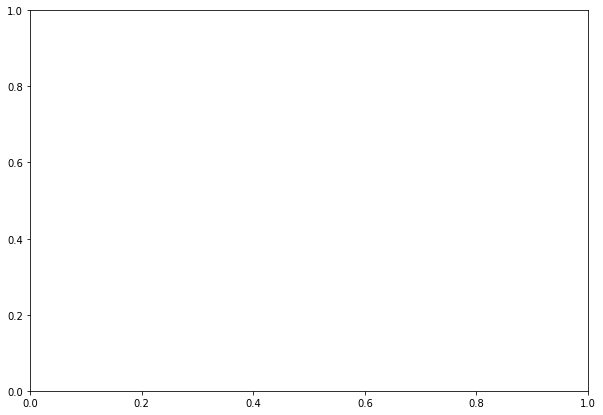

In [348]:
plot_prediction(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=y_predict)  ## Maybe this dont work on multiple feature dataset

In [349]:
len(X_train),len(y_train),len(X_test),len(y_test),len(y_predict)

(404, 404, 102, 102, 102)

In [350]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape,y_predict.shape

((404, 13), (404,), (102, 13), (102,), (102, 1, 1))